# Oasis Infobyte

In [ ]:
 Task : 1
IRIS FLOWER CLASSIFICATION

In [1]:
import pandas as pd#importing necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder

In [40]:
df=pd.read_csv("titanic data.csv")

In [41]:
df.head()#sample dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
print(df.shape)

(1309, 12)


In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [44]:
df.isna().sum()#null values

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [45]:
df.dropna(inplace=True)

In [46]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [48]:
df=df[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,female,38.0,1,0,71.2833,C
3,4,1,1,female,35.0,1,0,53.1000,S
6,7,0,1,male,54.0,0,0,51.8625,S
10,11,1,3,female,4.0,1,1,16.7000,S
11,12,1,1,female,58.0,0,0,26.5500,S


In [49]:
le=LabelEncoder()

In [50]:
df['Embarked']=le.fit_transform(df['Embarked'])

In [51]:
df['Sex']=le.fit_transform(df['Sex'])

In [52]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,0,38.0,1,0,71.2833,0
3,4,1,1,0,35.0,1,0,53.1000,2
6,7,0,1,1,54.0,0,0,51.8625,2
10,11,1,3,0,4.0,1,1,16.7000,2
11,12,1,1,0,58.0,0,0,26.5500,2


In [53]:
df=df[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','Survived']]

In [54]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [55]:
print(y.shape)
x.shape
df.shape

(270,)


(270, 9)

In [56]:
y=y.to_numpy().reshape(-1,1)
y.shape

(270, 1)

In [57]:
xtr,xtst,ytr,ytst=train_test_split(x,y,random_state=42,test_size=0.2)

In [58]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(xtr,ytr)

pred_y = model1.predict(xtst)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(ytst,pred_y))

Acc= 0.5740740740740741


D:\sig\tools\anaconda\New folder\envs\env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=8)
model2.fit(xtr,ytr)
y_pred2 = model2.predict(xtst)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(ytst,y_pred2))

Accuracy Score: 0.7407407407407407


D:\sig\tools\anaconda\New folder\envs\env\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [60]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(xtr,ytr)
y_pred3 = model3.predict(xtst)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(ytst,y_pred3))

Accuracy Score: 0.8148148148148148


D:\sig\tools\anaconda\New folder\envs\env\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(xtr,ytr)
y_pred4 = model4.predict(xtst)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(ytst,y_pred4))

Accuracy Score: 0.8148148148148148


In [64]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
1,2,1,0,38.0,1,0,71.2833,0,1
3,4,1,0,35.0,1,0,53.1000,2,1
6,7,1,1,54.0,0,0,51.8625,2,0
10,11,3,0,4.0,1,1,16.7000,2,1
11,12,1,0,58.0,0,0,26.5500,2,1


In [70]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.57,0.81,0.74,0.81]})

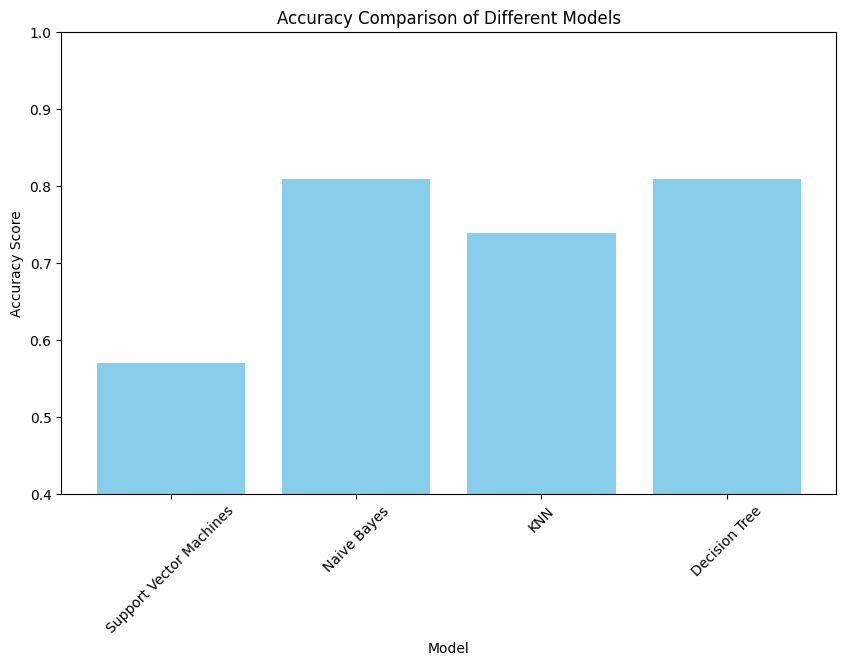

In [72]:
plt.figure(figsize=(10, 6))
plt.bar(results['Model'], results['Score'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0.4, 1.0)  # Set the y-axis limits for better visualization
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.show()

### Hence I will use Decision Tree algorithm as it has the highest accuracy.
